In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/CarFeatures.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
car_data.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 25 non-null     object 
 1   Fuel Type            25 non-null     object 
 2   Aspiration           25 non-null     object 
 3   Number of Doors      25 non-null     object 
 4   Body Style           25 non-null     object 
 5   Drive Wheels         25 non-null     object 
 6   Engine Location      25 non-null     object 
 7   Number of Cylinders  25 non-null     object 
 8   Wheel Base           25 non-null     float64
 9   Length               25 non-null     float64
 10  Width                25 non-null     float64
 11  Height               25 non-null     float64
 12  Curb Weight          25 non-null     int64  
 13  Engine Size          25 non-null     int64  
 14  Horsepower           25 non-null     int64  
 15  City MPG             25 non-null     int64

In [ ]:
car_data.isnull().sum()

,0
Make,0
Fuel Type,0
Aspiration,0
Number of Doors,0
Body Style,0
Drive Wheels,0
Engine Location,0
Number of Cylinders,0
Wheel Base,0
Length,0


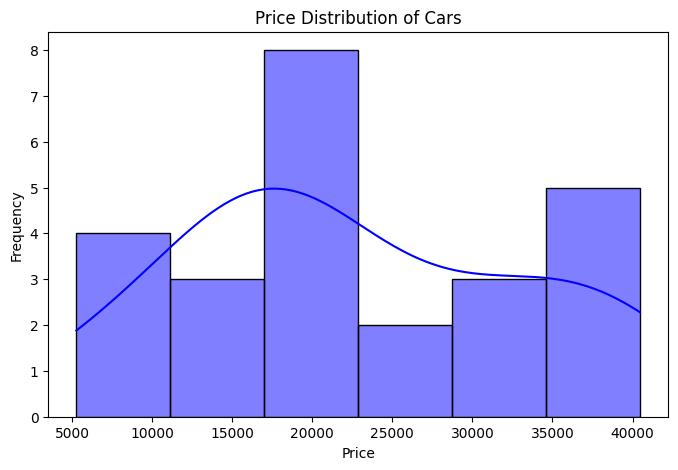

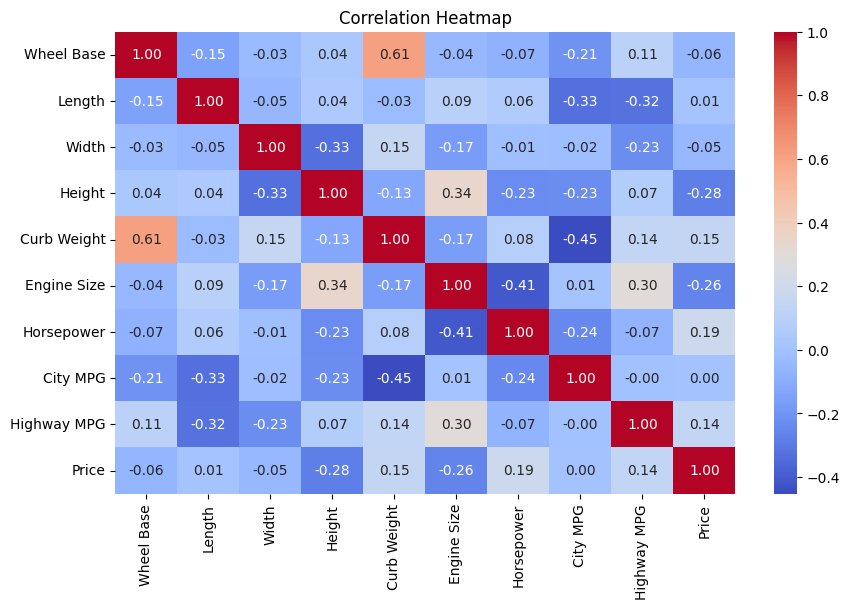

In [ ]:
#Q1.

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the 'Price' column
plt.figure(figsize=(8,5))
sns.histplot(car_data['Price'], kde=True, color='blue')
plt.title('Price Distribution of Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(10,6))
# Select only numerical columns for correlation analysis
numerical_data = car_data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Q2.

# Descriptive statistics for numerical columns
car_data.describe()

,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,105.736000,173.928000,65.868000,52.680000,2907.720000,192.360000,168.760000,29.720000,37.640000,22684.920000
std,9.046403,18.508523,3.632804,3.623534,777.650924,79.342548,73.189981,10.659581,10.664896,10684.205266
min,91.700000,143.400000,60.500000,47.800000,1488.000000,79.000000,50.000000,13.000000,16.000000,5272.000000
25%,96.000000,161.400000,62.500000,50.000000,2108.000000,106.000000,100.000000,24.000000,30.000000,14838.000000
50%,106.800000,172.400000,66.300000,51.800000,3231.000000,199.000000,168.000000,29.000000,41.000000,18524.000000
75%,113.900000,187.800000,68.500000,55.100000,3433.000000,252.000000,231.000000,38.000000,45.000000,31393.000000
max,119.600000,207.600000,71.500000,59.800000,3922.000000,319.000000,288.000000,49.000000,53.000000,40466.000000


In [ ]:
#Q3.

# Identify the costliest car and the cheapest car by average price
costliest_car = car_data.loc[car_data['Price'].idxmax()]
cheapest_car = car_data.loc[car_data['Price'].idxmin()]
print(costliest_car[['Make', 'Price']])
print(cheapest_car[['Make', 'Price']])

Make     Toyota
Price     40466
Name: 6, dtype: object
Make     Toyota
Price      5272
Name: 0, dtype: object


In [ ]:
#Q4.

# Identify fuel type car with the highest average price
avg_price_by_fuel = car_data.groupby('Fuel Type')['Price'].mean()
avg_price_by_fuel

,Price
Fuel Type,
Diesel,20199.416667
Gas,24979.230769


In [ ]:
#Q5.

# Construct a contingency table (Make as row variable)
contingency_table = pd.crosstab(index=car_data['Make'], columns='Count')
contingency_table

col_0,Count
Make,
Audi,3
BMW,4
Chevrolet,1
Ford,2
Honda,1
Mazda,3
Mercedes,3
Mitsubishi,3
Nissan,1


In [ ]:
#Q6.

# Probability that a randomly selected car will be a BMW
bmw_count = car_data[car_data['Make'] == 'BMW'].shape[0]
total_cars = car_data.shape[0]
bmw_probability = bmw_count / total_cars
bmw_probability

0.16

In [ ]:
#Q7.

# Probability that a randomly selected car will be an Audi
audi_count = car_data[car_data['Make'] == 'Audi'].shape[0]
total_cars = car_data.shape[0]
audi_probability = audi_count / total_cars
audi_probability

0.12

In [ ]:
#Q8.

We are conducting a two-sample t-test to check if the average prices of gas cars and diesel cars are significantly different.

Null Hypothesis (H₀): The average price of gas cars is equal to the average price of diesel cars.

𝐻
0
:
𝜇
𝑔
𝑎
𝑠
=
𝜇
𝑑
𝑖
𝑒
𝑠
𝑒
𝑙


Alternate Hypothesis (H₁): The average price of gas cars is different from the average price of diesel cars.

𝐻
1
:
𝜇
𝑔
𝑎
𝑠
≠
𝜇
𝑑
𝑖
𝑒
𝑠
𝑒
𝑙


In [ ]:
#Q9.

from scipy import stats

# Q9: Filter gas and diesel cars
gas_cars = car_data[car_data['Fuel Type'] == 'Gas']['Price']
diesel_cars = car_data[car_data['Fuel Type'] == 'Diesel']['Price']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(gas_cars, diesel_cars)

# Display t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: The price of gas cars is significantly different from that of diesel cars.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in price between gas and diesel cars.")

t-statistic: 1.1236308256408953
p-value: 0.27276131360711153
Fail to reject the null hypothesis: There is no significant difference in price between gas and diesel cars.


In [ ]:
#Q10.

# Probability of selecting a luxury car (BMW, Mercedes, Audi)
luxury_car_brands = ['BMW', 'Mercedes', 'Audi']
luxury_car_count = car_data[car_data['Make'].isin(luxury_car_brands)].shape[0]
total_cars = car_data.shape[0]
luxury_car_probability = luxury_car_count / total_cars
luxury_car_probability

0.4

In [ ]:
#Q11.

import math

# Number of ways to arrange 3 unique cars (Permutation)
unique_makes = car_data['Make'].nunique()  # Count of unique car makes
arrangements = math.perm(unique_makes, 3)
arrangements

720

In [ ]:
#Q12.

# Probability that a randomly picked car with 8 cylinders is a BMW
cars_with_8_cylinders = car_data[car_data['Number of Cylinders'] == 8]
bmw_with_8_cylinders_count = cars_with_8_cylinders[cars_with_8_cylinders['Make'] == 'BMW'].shape[0]
total_8_cylinder_cars = cars_with_8_cylinders.shape[0]

# Check if there are any cars with 8 cylinders
if total_8_cylinder_cars > 0:
  bmw_8_cylinder_probability = bmw_with_8_cylinders_count / total_8_cylinder_cars
  print(bmw_8_cylinder_probability)
else:
  print("There are no cars with 8 cylinders in the dataset.")

There are no cars with 8 cylinders in the dataset.


In [ ]:
#Q13.

from scipy.stats import binom

# Binomial probability for selecting exactly 3 out of 7 cars with 'Turbo' aspiration
turbo_count = car_data[car_data['Aspiration'] == 'Turbo'].shape[0]
total_cars = car_data.shape[0]
p_turbo = turbo_count / total_cars

# Probability of exactly 3 Turbo cars in 7 selections
n = 7  # Number of cars selected
k = 3  # Number of Turbo cars desired
binom_prob = binom.pmf(k, n, p_turbo)
binom_prob

0.29320959754240045